In [5]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [103]:
from unstructured.partition.auto import partition
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from typing import List
from PIL import Image

In [38]:
filepath = "/app/data/data/qa.pdf"

In [104]:
elements = partition(filepath,
                     strategy="ocr_only",
                     languages=["rus"],
                     infer_table_structure=True)

In [105]:
def plt_table(images: List[Image], elements):
    for i,image in enumerate(images):
        fig, ax = plt.subplots()
        for element in elements:
            element = element.to_dict()
            if element["metadata"]["page_number"] == i+1:
                coord = element["metadata"]["coordinates"]["points"]
                (x, y) = coord[0]
                width = np.array(coord[3])[0] - np.array(coord[0])[0]
                height = np.array(coord[1])[1] - np.array(coord[0])[1]
                rect = Rectangle((x, y), width=width, height=height, edgecolor="red", facecolor="none")
                ax.add_patch(rect)
        plt.axis("off")
        plt.imshow(image)
        plt.show()

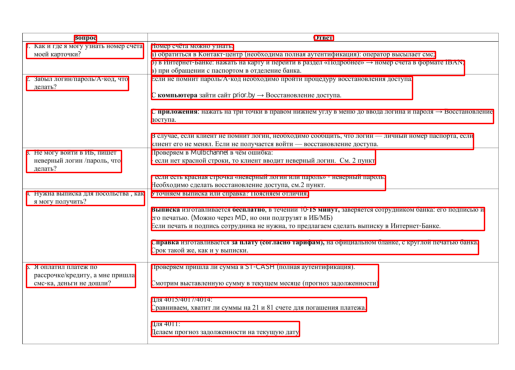

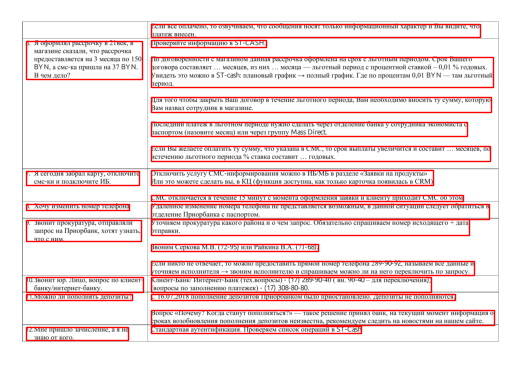

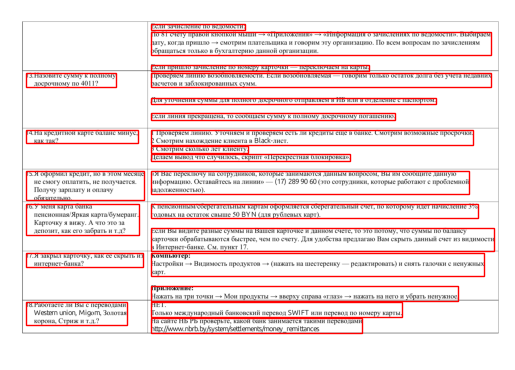

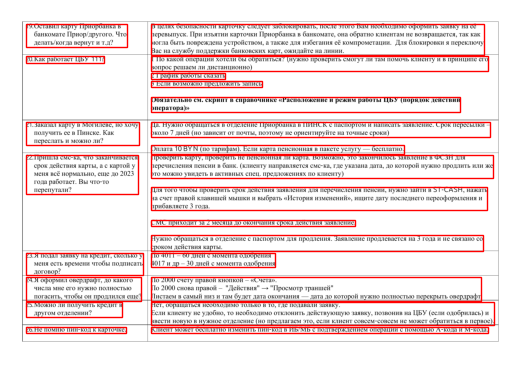

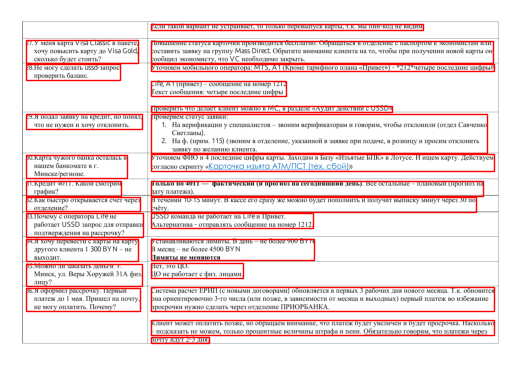

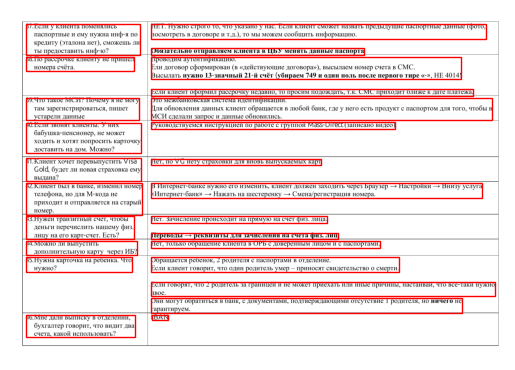

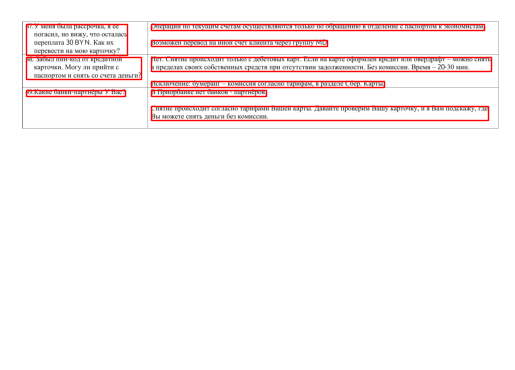

In [106]:
images = convert_from_path(filepath)

plt_table(images, elements)